# Brincando com dados: Análise de Oscar - Rotten Tomatoes


Chegamos naquela época do ano, praticamente o carnaval dos cinéfilos, aquela época que a Meryl Streep vai ser indicada. A época das premiações "mais importantes" do mundo do cinema. 

<img src="https://media.giphy.com/media/OpAkQ1sPBnBUA/giphy.gif" alt="meryl" style="width: 300px;"/>

Então vamos aproveitar essa vibe cinematográfica para fazer umas análises?

Ano passado fiz dois posts sobre o mesmo assunto [Brincando com dados: Ganhadores do Oscar Parte 1](http://developers.hekima.com/data-science/brincando-com-dados/2016/02/11/importing_oscar_runners/) e [Brincando com dados: Ganhadores do Oscar Parte 2](http://developers.hekima.com/data-science/brincando-com-dados/2016/02/11/oscar-analysis/). Neles eu fiz algumas análises e tentei prever alguns prêmios. Acertei os ganhadores de melhor ator e melhor atriz mas errei a previsão do ganhador de melhor filme... =(

<img src="https://media.giphy.com/media/QJY9tY29IQGMU/giphy.gif" alt="Sadness" style="width: 400px;"/>

Mas eu sou brasileiro e não desisto nunca, fiquei pensando por qual motivo o algoritmo errou o resultado. Aparentemente ano passado foi um outlier, dado que nem o DGA nem o PGA bateram com o ganhador do Oscar.

O Oscar tem um sistema peculiar de votação, que muitas vezes valoriza mais os filmes "menos" odiados, pensei então que os valores do [Rotten Tomatoes](http://rottentomatoes.com/) poderiam refletir algo nesse sentido.


## Como funciona o Rotten Tomatoes


O Rotten Tomatoes é um site para avaliação de filmes, seu sistema difere um pouco de sites como [IMDb](www.imdb.com) pois cada pessoa ou crítico avalia o filme entre 1 e 5 estrelas, mas o site considera esse voto de uma forma binária, isto é, ou o filme é *Fresh* (Fresco) ou *Rotten* (Podre). O score final do filme é o % de notas Fresh que ele recebeu.

Outra diferença do Rotten Tomatoes é que ele possui dois valores, um para críticos e outro para o público. Nesse post vamos analisar esses dois scores separadamente e em conjunto.


## Objetivo 

Então, o objetivo desse post é demonstrar formas de analisar uma feature nova, como visualizar os valores, estudar relações, fazer transformações e quais insights elas podem gerar. Além disso, vou mostrar aqui um pouco de sobre [MongoDB](https://www.mongodb.com/), [PyMongo](https://api.mongodb.com/python/current/) e principalmente sobre a biblioteca [Pandas](http://pandas.pydata.org/).

## Preparativos
Para ficar mais simples e didático decidimos utilizar o Jupyter Notebook, para fazer a instalação dele siga o tutorial descrito aqui: http://jupyter.readthedocs.org/en/latest/install.html 

Para rodar o código ou acompanhar o post pelo Jupyter Notebook baixe o arquivo: ARQUIVO.PY

## Base
[MongoDB](https://www.mongodb.com/): O MongoDB é um banco de dados não relacional, ele é orientado a documentos e utiliza um formato chamado BSON, bem próximo ao JSON. Ele é bem simples de entender e utilizar.

[Pandas](http://pandas.pydata.org/): Biblioteca de python para estrutura e análise de dados.

[PyMongo](https://api.mongodb.com/python/current/): PyMongo é uma biblioteca em python para acessar o MongoDB.


Vamos lá então?


<img src="https://media.giphy.com/media/W3z1M5ek70Ztm/source.gif" alt="rambo" style="width: 300px;"/>


Nós vamos utilizar a mesma base de dados criadas nos posts do ano passado, vamos então criar um cliente e ligar a coleção chamada "movies".

In [2]:
import json
from pymongo import MongoClient

client = MongoClient() # Primeiramente pegamos o client do Mongodb
db = client.imdb 
movie_db = db.movies

## Atualizando vencedores dos prêmios

Vamos agora atualizar no MongoDB quais os vencedores das principais premiações.

In [3]:
# Now we are going to add the Sag Winners

sag_winners = ["Hidden Figures","Spotlight","Birdman", "American Hustle", "Argo", "The Help", "The King's Speech", 
               "Inglorious Bastards", "Slumdog Millionaire", "No Country for Old Men", "Little Miss Sunshine (2006)",
               "Crash", "Sideways", "Chicago", "The Lord of the Rings: The Return of the King", "Gosford Park", "Traffic"]

golden_globe = ['Moonlight', 'La la land' ,"The Martian","The Revenant","Boyhood", "The Grand Budapest Hotel", "12 Years a Slave", "American Hustle", "Argo", "Les Misérables", 
               "The Descendants", "The Artist", "The Social Network", "The Kids Are All Right", "Avatar", "The Hangover", 
               "Slumdog Millionaire", "Vicky Cristina Barcelona", "Atonement", "Sweeney Todd", "Babel", "Dreamgirls", 
               "Brokeback Mountain", "Walk the Line", "The Aviator", "Sideways", "The Lord of the Rings: The Return of the King",
               "Lost in Translation", "The Hours", "Chicago", "A Beaultiful Mind", "Moulin Rouge!", "Gladiator", "Almost Famous"]

nyfcc_winners = ['La la land', "Carol","Son of Saul","Boyhood", "Zero Dark Thirty", "The Artist", "The Social Network",
                 "The Hurt Locker", "Slumdog Millionaire","There Will Be Blood", "United 93", 
                 "Sideways", "Brokeback Mountain", "The Lord of the Rings: The Return of the King",
                "Far from Heaven", "Mulholland Drive"]

dga_winners = ["La la land","The Revenant","Birdman","Gravity", "Argo", "The Artist", "The King's Speech", "The Hurt Locker",
               "Slumdog Millionaire", 
               "No Country for Old Men","The Departed", "Brokeback Mountain", "Million Dollar Baby", 
               "The Lord of the Rings: The Return of the King",  "Chicago",
               "A Beautiful Mind", "Crouching Tiger, Hidden Dragon"]

#NAO SAIU AINDA
wga_winners = ['The Big Short',"Spotlight","The Imitation Game","The Grand Budapest Hotel", "Captain Phillips", "Her (2013)", "Argo", "Zero Dark Thirty",
               "The Descendants", 
               "Inception","The Social Network", "The Hurt Locker", "Up in the Air", "Milk", "Juno",
               "Slumdog Millionaire", "No Country for Old Men",  "The Departed",
               "Little Miss Sunshine (2006)","Brokeback Mountain", "Crash", "Sideways", "Eternal Sunshine of the Spotless Mind",
               "American Splendor", "Lost in Translations", "Bowling for Columbine", "The Hours", "A Beautiful Mind", "Gosford Park"
               , "Traffic", "You Can Count on Me"]

pga_winners = ['La la land','The Big Short', "Birdman","12 Years a Slave", "Argo", "The Artist", "The King's Speech", 
               "The Hurt Locker", "Slumdog Millionaire", "No Country for Old Men", 
               "Little Miss Sunshine", "Brokeback Mountain", "The Aviator", "The Lord of the Rings: The Return of the King",
               "Chicago", "Moulin Rouge!", "Gladiator"]

#NAO SAIU AINDA
bafta_winners = ["The Revenant", "Boyhood","12 Years a Slave", "Argo", "The Artist", "The King's Speech", 
               "The Hurt Locker", "Slumdog Millionaire", "Atonement", 
               "The Queen", "Brokeback Mountain", "The Aviator", "The Lord of the Rings: The Return of the King",
               "The Pianist", "The Lord of the Rings: The Fellowship of the Ring", "Gladiator"]

In [4]:
# Starting everyone with false
db.movies.update_many({},{"$set": {"sag_winner": False, "golden_globe": False, 
                                   "nyfcc_winner": False,'dga_winner': False,
                                   "wga_winner": False,'pga_winner': False,
                                   "bafta_winner": False}})

for winner in sag_winners:
    db.movies.update_one({'title': winner},{"$set": {"sag_winner": True}})
for winner in golden_globe:
    db.movies.update_one({'title': winner},{"$set": {"golden_globe": True}})
for winner in nyfcc_winners:
    db.movies.update_one({'title': winner},{"$set": {"nyfcc_winner": True}})    
for winner in dga_winners:
    db.movies.update_one({'title': winner},{"$set": {"dga_winner": True}})
for winner in wga_winners:
    db.movies.update_one({'title': winner},{"$set": {"wga_winner": True}})   
for winner in pga_winners:
    db.movies.update_one({'title': winner},{"$set": {"pga_winner": True}})  
for winner in bafta_winners:
    db.movies.update_one({'title': winner},{"$set": {"bafta_winner": True}})    

## Carregamento dos dados

Criamos um cursor utilizando uma consulta vazia, isto é, não estamos filtrando nada, todos filmes serão retornados. Logo depois, iteramos pelo cursor adicionando os documentos retornados na lista "movies".

Depois disso, vamos criar um [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) com todos os filmes e aplicar uma transformação em suas colunas.

In [5]:
movie_cursor = movie_db.find()
i = 0
movies = []
for document in movie_cursor: 
    movies.append(document)    

In [6]:
import pandas as pd

df = pd.DataFrame(movies)
df = df.apply(lambda x: pd.to_numeric(x, errors='ignore')) # set all columns that are a number to numeric 

In [7]:
df.columns.values

array([u'_id', u'assistant director', u'bafta_winner', u'bafta_winners',
       u'budget', u'cast', u'casting director', u'countries',
       u'dga_winner', u'director', u'distributors', u'editor', u'genres',
       u'golden_globe', u'languages', u'nyfcc_winner', u'opening_weekend',
       u'original music', u'oscar_year', u'pga_winner', u'plot',
       u'production companies', u'rotten_critic', u'rotten_people',
       u'runtime', u'sag_winner', u'special effects companies', u'title',
       u'user_rating', u'wga_winner', u'winner', u'writer'], dtype=object)

# Visualizando Dados

Vamos então analisar nossas features "rotten_critic" e "rotten_public", lembrando que seus valores podem ir de 0 a 100. 

Para visualizar os top filmes em relação a "rotten_critic" vamos fazer uma ordenação no Dataframe, seguido de um filtro de colunas e chamar a função *head()*.


In [8]:
print('O score médio relativo a nota dos críticos dos filmes disputando Oscar de melhor filme foi\n'+ str(df['rotten_critic'].mean()))
print('\nA mediana do score relativo a nota dos críticos dos filmes disputando Oscar de melhor filme foi\n'+str(df['rotten_critic'].median()))

df.sort_values(by='rotten_critic',ascending=False).filter(items=['title', 'rotten_critic', 'oscar_year','winner',]).head(10)

O score médio relativo a nota dos críticos dos filmes disputando Oscar de melhor filme foi
88.4188034188

A mediana do score relativo a nota dos críticos dos filmes disputando Oscar de melhor filme foi
91.0


,title,rotten_critic,oscar_year,winner
59,Selma,99,2015,False
86,Toy Story 3,99,2011,False
89,The Hurt Locker,98,2010,True
97,up,98,2010,False
56,Boyhood,98,2015,False
8,Moonlight,98,2017,False
3,Hell or High Water,98,2017,False
43,The Queen (2006),97,2007,False
73,Brooklyn,97,2016,False
74,Mad Max: Fury Road,97,2016,False


Podemos ver que dentre os 10 filmes de maior nota dos críticos só existe um ganhador de Oscar, que foi o "The Hurt Locker" com valor 98.

<img src="http://arts.columbia.edu/files/soa/hurt_locker_poster_m_0.jpg" alt="Drawing" style="width: 400px;"/>

Agora vamos ordenar pela nota do público.

In [9]:
print('O score médio relativo a nota do público dos filmes disputando Oscar de melhor filme foi\n'+ str(df['rotten_people'].mean()))
print('\nA mediana do score relativo a nota do público dos filmes disputando Oscar de melhor filme foi\n'+str(df['rotten_people'].median()))

df.sort_values(by='rotten_people',ascending=False).filter(items=['title','rotten_people','oscar_year','winner']).head(10)

O score médio relativo a nota do público dos filmes disputando Oscar de melhor filme foi
84.3675213675

A mediana do score relativo a nota do público dos filmes disputando Oscar de melhor filme foi
85.0


,title,rotten_people,oscar_year,winner
18,The Pianist,95,2003,False
17,The Lord of the Rings: The Two Towers,95,2003,False
22,The Lord of the Rings: The Fellowship of the Ring,95,2002,False
104,Life of Pi,94,2013,False
2,Hacksaw Ridge,94,2017,False
4,Hidden Figures,94,2017,False
61,Whiplash,94,2015,False
39,The Departed,94,2007,True
77,Room,93,2016,False
78,Spotlight,93,2016,True


Nesse caso, temos 2 vencedores dentre os 10 primeiros da lista do público (inclusive aquele "maldito" ganhador de 2016), mas será que isso é relevante?

Parece também que o público avalia os filmes com valores **mais baixos**, com uma média quase 4 pontos mais baixa e uma mediana 6 pontos mais baixas. Além disso, podemos perceber que a mediana é bem alta (91) o que mostra que os filmes indicados tendem a ter uma avaliação boa pelos críticos.


Podemos perceber também que os valores da média e da mediana são bem próximos, o que pode indicar que a distribuição seja parecida com uma normal.

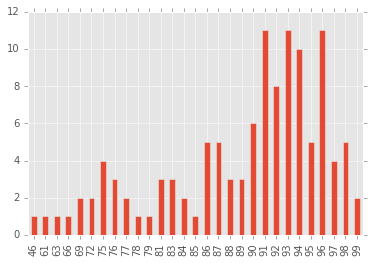

In [10]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

plt.figure()

df['rotten_critic'].value_counts().sort_index().plot(kind='bar'); 
plt.show()

Parece que existem alguns filmes com scores abaixo de 90 mas a grande maioria fica com valores acima de 91, inclusive alguns filmes com valores abaixo de 70, mas vamos analisá-los mais a frente.

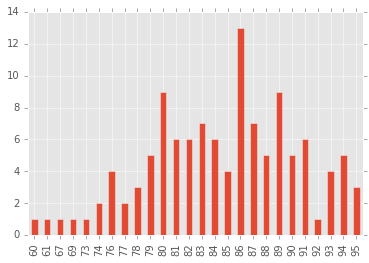

In [11]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

plt.figure()

df['rotten_people'].value_counts().sort_index().plot(kind='bar'); 
plt.show()

Já no gráfico relativo ao público vemos um comportamento mais regular, com um pico peculiar no valor 86, variando mais entre 79 e 91. 

Agora que já analisamos a diferença entre o score do crítico e do público, vamos ver se existe uma diferença entre os ganhadores do oscar e os outros?

Vamos criar então dois Dataframes, um com todos ganhadores do Oscar e outros com os perdedores.

In [14]:
winners = df[(df['winner'] == True) & (df['oscar_year'] != 2017)]
losers = df[(df['winner'] == False) & (df['oscar_year'] != 2017)]

print('------- Críticos -------')
print('Vencedores média: '+ str(winners['rotten_critic'].mean()))
print('Perdedores média: '+ str(losers['rotten_critic'].mean()))

print('\nVencedores mediana: '+ str(winners['rotten_critic'].median()))
print('Perdedores mediana: '+ str(losers['rotten_critic'].median()))

print('\n------ Público -------')
print('Vencedores média: '+ str(winners['rotten_people'].mean()))
print('Perdedores média: '+ str(losers['rotten_people'].mean()))

print('\nVencedores mediana: '+ str(winners['rotten_people'].median()))
print('Perdedores mediana: '+ str(losers['rotten_people'].median()))

------- Críticos -------
Vencedores média: 90.125
Perdedores média: 87.6304347826

Vencedores mediana: 92.5
Perdedores mediana: 91.0

------ Público -------
Vencedores média: 88.125
Perdedores média: 83.402173913

Vencedores mediana: 89.0
Perdedores mediana: 84.0


Parece que o score do público seria um "termômetro" mais interessante do que o score dos críticos e parece que utilizar esses valores como feature pode ser bom para o modelo final. Imagino que fazer uma normalização dos valores seja importante.

Vamos agora analisar os extremos para ver os **outliers**?

Primeiramente vamos ver quais os **"piores"** filmes a disputar a estatueta?

In [15]:
df.sort_values(by='rotten_critic',ascending=True).filter(items=['title','rotten_critic','oscar_year','winner']).head(10)

,title,rotten_critic,oscar_year,winner
110,Extremely Loud & Incredibly Close,46,2012,False
13,The Reader,61,2009,False
30,Chocolat,63,2001,False
91,The Blind Side,66,2010,False
40,Babel,69,2007,False
103,Les Misérables,69,2013,False
55,American Sniper,72,2015,False
10,Benjamin Button,72,2009,False
111,The Help,75,2012,False
34,Crash,75,2006,True


Parece que o filme com menor score dos críticos foi ["Extremely Loud & Incredibly Close"](https://www.rottentomatoes.com/m/extremely_loud_and_incredibly_close) com Tom Hanks (Shame on you Tom...) , seguido por ["O Leitor"](https://www.rottentomatoes.com/m/reader) e ["Chocolat"](https://www.rottentomatoes.com/m/1103080-chocolat).

<img src="https://media.giphy.com/media/3oEjHWzZQaCrZW2aWs/giphy.gif" alt="Hanks" style="width: 400px;"/>


O único ganhador do Oscar que está no bottom 10 dos críticos é ["Crash"](https://www.rottentomatoes.com/m/1144992-crash), que como já foi dito em posts anteriores foi uma vitória bem discutível em 2006 quando disputou contra ["Munique"](https://www.rottentomatoes.com/m/munich), ["Capote"](https://www.rottentomatoes.com/m/1151898-capote), ["O Segredo de Brokeback Mountain"](https://www.rottentomatoes.com/m/brokeback_mountain) e ["Boa Noite e Boa Sorte"](https://www.rottentomatoes.com/m/1152019-good_night_and_good_luck).

Vamos ver agora com relação ao público?

In [16]:
df.sort_values(by='rotten_people',ascending=True).filter(items=['title','rotten_people','oscar_year','winner']).head(10)

,title,rotten_people,oscar_year,winner
115,The Tree of Life,60,2012,False
110,Extremely Loud & Incredibly Close,61,2012,False
96,A Serious Man,67,2010,False
27,Michael Clayton,69,2008,False
84,The Kids Are All Right,73,2011,False
116,War Horse,74,2012,False
62,American Hustle,74,2014,False
48,Seabiscuit,76,2004,False
88,Winter's Bone,76,2011,False
101,Beasts of the Southern Wild,76,2013,False


Parece que ["Árvore da Vida"](https://www.rottentomatoes.com/m/the_tree_of_life_2011) não foi muito curtido pelo público de maneira geral, outro ponto interessante é que nesse bottom 10 não temos nenhum ganhador de Oscar.

<img src="https://media.giphy.com/media/LPGtFowd29hza/source.gif" alt="Hanks" style="width: 400px;"/>

O quão diferente será que é a nota do público com a dos críticos para o mesmo filme? 

Vamos ver os casos extremos relativos a essa diferença, vamos criar uma nvoa coluna que é a nota do crítico menos a nota do público.

In [17]:
df['diff'] = df['rotten_critic'].sub(df['rotten_people'])
print('Média da diferença: ' + str(df['diff'].mean()))
print('Mediana da diferença: ' + str(df['diff'].median()))
df.sort_values(by='diff',ascending=True).filter(items=['title','rotten_critic','rotten_people','diff','oscar_year','winner']).head(10)

Média da diferença: 4.05128205128
Mediana da diferença: 5.0


,title,rotten_critic,rotten_people,diff,oscar_year,winner
30,Chocolat,63,83,-20,2001,False
91,The Blind Side,66,85,-19,2010,False
13,The Reader,61,79,-18,2009,False
19,A Beautiful Mind,75,93,-18,2002,True
110,Extremely Loud & Incredibly Close,46,61,-15,2012,False
111,The Help,75,89,-14,2012,False
23,Moulin Rouge!,76,89,-13,2002,False
34,Crash,75,88,-13,2006,True
55,American Sniper,72,84,-12,2015,False
29,Gladiator,76,87,-11,2001,True


Temos diferenças de 20 pontos!! Parece que público e críticos não tem a mesma visão sobre filmes como ["Chocolat"](https://www.rottentomatoes.com/m/1103080-chocolat), ["Uma mente brilhante"](https://www.rottentomatoes.com/m/beautiful_mind) e ["Gladiador"](https://www.rottentomatoes.com/m/gladiator). (Será que tem alguma ligação com o Russell Crowe?)

<img src="https://media.giphy.com/media/rvaQRHCzisFeo/giphy.gif" alt="Hanks" style="width: 400px;"/>


Outra coisa interessante que podemos notar é que existem 3 ganhadores do Oscar nesse top 10 em que o público gostou muito mais que os críticos. 

Vamos ver como funciona no caso inverso.


In [20]:
df.sort_values(by='diff',ascending=False).filter(items=['title','rotten_critic','rotten_people','diff','oscar_year','winner']).head(10)

,title,rotten_critic,rotten_people,diff,oscar_year,winner
115,The Tree of Life,84,60,24,2012,False
96,A Serious Man,89,67,22,2010,False
27,Michael Clayton,90,69,21,2008,False
43,The Queen (2006),97,76,21,2007,False
84,The Kids Are All Right,93,73,20,2011,False
62,American Hustle,93,74,19,2014,False
88,Winter's Bone,94,76,18,2011,False
53,Sideways,96,78,18,2005,False
56,Boyhood,98,81,17,2015,False
112,Hugo,94,78,16,2012,False


A maior diferença ficou com ["Árvore da Vida"](https://www.rottentomatoes.com/m/the_tree_of_life_2011), que não ganhou o Oscar mas merecia o prêmio "Fui ver porque tinha o Brad Pitt". E novamente podemos perceber que quando os críticos **gostam mas o público não a lista gerada não possui nenhum ganhador**. 

Vamos fazer essa lista apenas para os filmes desse ano de 2017?? 

Então vamos listar aqui pela maior diferença entre público e críticos.

In [18]:
print('Média dos criticos: ' + str(df[df["oscar_year"]== 2017]['rotten_critic'].mean()))
print('Média do publico: ' + str(df[df["oscar_year"]== 2017]['rotten_people'].mean()))
print('\n')
print('Mediana dos criticos: ' + str(df[df["oscar_year"]== 2017]['rotten_people'].median()))
print('Mediana do publico: ' + str(df[df["oscar_year"]== 2017]['rotten_critic'].median()))
print('\n')
print('Média da diferença: ' + str(df[df["oscar_year"]== 2017]['diff'].mean()))
print('Mediana da diferença: ' + str(df[df["oscar_year"]== 2017]['diff'].median()))
df[df["oscar_year"]== 2017].sort_values(by='diff',ascending=True).filter(items=['title','rotten_critic','rotten_people','diff','oscar_year','winner']).head(10)

Média dos criticos: 93.4444444444
Média do publico: 87.5555555556


Mediana dos criticos: 88.0
Mediana do publico: 94.0


Média da diferença: 5.88888888889
Mediana da diferença: 9.0


,title,rotten_critic,rotten_people,diff,oscar_year,winner
2,Hacksaw Ridge,86,94,-8,2017,False
6,Lion,88,93,-5,2017,False
4,Hidden Figures,93,94,-1,2017,False
5,La la land,93,86,7,2017,False
3,Hell or High Water,98,89,9,2017,False
8,Moonlight,98,88,10,2017,False
0,Arrival,94,83,11,2017,False
1,Fences,95,80,15,2017,False
7,Manchester by the sea,96,81,15,2017,False


Por tudo que já vimos até agora nessa análise: ["Manchester by the sea"](https://www.rottentomatoes.com/m/manchester_by_the_sea) e ["Moonlight"](https://www.rottentomatoes.com/m/moonlight_2016) que eram considerados fortes concorrentes estão com chances menores. Já ["La la land"](https://www.rottentomatoes.com/m/la_la_land) que é o forte favorito ganha forças apesar de estar em 5 lugar em nota do público. 

Agora vamos fazer uma análise da média entre a nota dos críticos e do público e ver qual a correlação desse valor com a vitória do oscar?


In [19]:
df['mean_rotten'] = df['rotten_critic'].add(df['rotten_people']).div(2)

df.sort_values(by='mean_rotten',ascending=False).filter(items=['title','rotten_critic','rotten_people','mean_rotten','oscar_year','winner']).head(10)

,title,rotten_critic,rotten_people,mean_rotten,oscar_year,winner
18,The Pianist,96,95,95.5,2003,False
17,The Lord of the Rings: The Two Towers,96,95,95.5,2003,False
78,Spotlight,96,93,94.5,2016,True
61,Whiplash,94,94,94.0,2015,False
86,Toy Story 3,99,89,94.0,2011,False
97,up,98,90,94.0,2010,False
77,Room,94,93,93.5,2016,False
79,The King's Speech,95,92,93.5,2011,True
3,Hell or High Water,98,89,93.5,2017,False
4,Hidden Figures,93,94,93.5,2017,False


O filme com a média de público e crítica mais alta foi ["O Pianista"](https://www.rottentomatoes.com/m/pianist) (que deveria ter ganho em 2003), coincidentemente o segundo filme é também de 2003 e também não ganhou que foi ["Senhor dos Anéis e as duas torres"](https://www.rottentomatoes.com/m/the_lord_of_the_rings_the_two_towers). 

<img src="https://media.giphy.com/media/J3ZUjaOtahqM0/giphy.gif" alt="Hanks" style="width: 400px;"/>
<center>Imagem do filme o "O Pianista"</center>

Aparecem 2 filmes ganhadores de Oscar nesse top 10, dois que foram bem "disputados" em seus respectivos anos.

Onde será que está [Chicago](https://www.rottentomatoes.com/m/chicago) (ganhador de 2003) com relação os filmes do mesmo ano?


In [35]:
df[df["oscar_year"]== 2003].sort_values(by='mean_rotten',ascending=False).filter(items=['title','rotten_critic','rotten_people','mean_rotten','oscar_year','winner']).head(10)

,title,rotten_critic,rotten_people,mean_rotten,oscar_year,winner
17,The Lord of the Rings: The Two Towers,96,95,95.5,2003,False
18,The Pianist,96,95,95.5,2003,False
14,Chicago,86,83,84.5,2003,True
16,The Hours,81,84,82.5,2003,False
15,Gangs of New York,75,81,78.0,2003,False


Chicago aparece em 3 lugar, com 10 pontos de distância para ["O Pianista"](https://www.rottentomatoes.com/m/pianist) e ["Senhor dos Anéis e as duas torres"](https://www.rottentomatoes.com/m/the_lord_of_the_rings_the_two_towers). Será que foi uma zebra?

Vamos ver como fica essa mesma tabela com os filmes de 2017?

In [21]:
df[df["oscar_year"]== 2017].sort_values(by='mean_rotten',ascending=False).filter(items=['title','rotten_critic','rotten_people','mean_rotten','oscar_year','winner']).head(10)

,title,rotten_critic,rotten_people,mean_rotten,oscar_year,winner
3,Hell or High Water,98,89,93.5,2017,False
4,Hidden Figures,93,94,93.5,2017,False
8,Moonlight,98,88,93.0,2017,False
6,Lion,88,93,90.5,2017,False
2,Hacksaw Ridge,86,94,90.0,2017,False
5,La la land,93,86,89.5,2017,False
0,Arrival,94,83,88.5,2017,False
7,Manchester by the sea,96,81,88.5,2017,False
1,Fences,95,80,87.5,2017,False


Primeiramente podemos perceber que a diferença entre os filmes é bem menor do que em 2003. De ["Hell or High Water"](https://www.rottentomatoes.com/m/hell_or_high_water) e ["Hidden Figures"](https://www.rottentomatoes.com/m/hidden_figures) para ["La la land"](https://www.rottentomatoes.com/m/la_la_land) temos 4 pontos de diferença apenas.

In [33]:
df['rotten_position'] = 0.0

# Lets get each year 
years = sorted(df['oscar_year'].unique())
years.remove(2017)

analysis_by_year = [] 
# we filter the dataframe by the year and sort by the critics rotten
for year in years:
    result = df[df['oscar_year'] == year].sort_values(by='rotten_people',ascending=False).filter(items=['title', 'rotten_critic', 'rotten_people','oscar_year','winner',])
    
    analysis = {}
    analysis['year'] = year
    analysis['mean'] = result['rotten_people'].mean()
    analysis['median'] = result['rotten_people'].median()    
    
    #print('Analisando ano %s'%year)
    #now we get the average and the median for this year
    #print('Média das notas do publico: %s'%analysis['mean'])
    #print('Mediana das notas do publico: %s'%analysis['median'])
    
    i = 0
    for movie in result.iterrows():        
        if(movie[1]['winner']):
        #print('O ganhador "{}" do oscar estava na posição {} com o score de {}'.format(movie[1]['title'],i,movie[1]['rotten_people']))                        
            analysis['position'] = i 
            analysis['winner'] = movie[1]['title']
            
        index = df[df['title'] == movie[1]["title"]].index.tolist()[0] 
        df.set_value(index, 'rotten_position', (result.shape[0]-i)/float(result.shape[0]))
        i += 1
            
    analysis_by_year.append(analysis)
    #print('\n')   
    
df_by_year = pd.DataFrame(analysis_by_year)
df_by_year.head(20)

,mean,median,position,winner,year
0,84.200000,85.0,0,Gladiator,2001
1,87.200000,89.0,1,A Beautiful Mind,2002
2,87.600000,84.0,3,Chicago,2003
3,83.400000,86.0,1,The Lord of the Rings: The Return of the King,2004
4,84.200000,87.0,0,Million Dollar Baby,2005
5,83.400000,83.0,0,Crash,2006
6,84.800000,86.0,0,The Departed,2007
7,81.800000,86.0,1,No Country for Old Men,2008
8,85.200000,88.0,0,Slumdog Millionaire,2009
9,81.700000,82.0,3,The Hurt Locker,2010


Parece que a comparação dos scores do públicos em um dado ano pode ser um fator relevante para encontrarmos o possível vencedor, grande parte dos ganhadores está na posição 0 ou 1. A maior exceção é [Birdman](https://www.rottentomatoes.com/m/birdman_2014/) que estava em 7 lugar no ano de 2015!


Para normalizar a posição dos filmes, dado que não é um número fixo de concorrentes, criamos a coluna "rotten_position" que vai de 0.0 a 1.0, sendo 1.0 o filme que está em primeiro lugar em termos de Rotten Tomatoes no ano e 0.0 é o último da lista.

Vamos ver como fica essa feature para os ganhadores do Oscar.

In [41]:
df[df["oscar_year"]!= 2017].filter(items=['title','winner','rotten_position','oscar_year']).sort_values(by='winner',ascending=False).head(16)

,title,winner,rotten_position,oscar_year
9,Slumdog Millionaire,True,1.000000,2009
78,Spotlight,True,0.875000,2016
44,The Lord of the Rings: The Return of the King,True,0.800000,2004
39,The Departed,True,1.000000,2007
34,Crash,True,1.000000,2006
49,Million Dollar Baby,True,1.000000,2005
99,Argo,True,0.777778,2013
29,Gladiator,True,1.000000,2001
54,Birdman,True,0.125000,2015
24,No Country for Old Men,True,0.800000,2008


## Correlação

Vamos agora analisar a correlação dessas features com relação aos ganhadores?

Vamos remover o ano de 2017 pois não temos o resultado desse ano ainda.

Para isso vamos usar a função [corr()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) do Dataframe e selecionar apenas a coluna "winner" (Essa função retorna a correlação entre todas colunas com todas as outras).


In [42]:
df[df["oscar_year"]!= 2017].corr(method='spearman', min_periods=1).filter(items=['winner']).sort_values(by='winner',ascending=False)

,winner
winner,1.000000
dga_winner,0.706522
pga_winner,0.661557
sag_winner,0.486413
bafta_winner,0.435455
bafta_winners,0.435455
rotten_position,0.352077
user_rating,0.291143
rotten_people,0.288959
wga_winner,0.278639


Como era esperado o DGA e o PGA são as premiações mais correlacionadas com os ganhadores do Oscar. E é importante salientar que os Golden Globes estão com uma correlação baixíssima.

Das novas features adicionadas parece que o rotten position relativo ao score do público é a mais correlacionada, sendo a melhor feature depois dos principais prêmios, mas mesmo assim 0.35 é um valor baixo. Mas percebam também que a posição no ano em questão (rotten_position) é melhor do que o valor bruto do score (rotten_people).

Outra observação é que a correlação do score do público é muito próxima a nota no IMDB, apesar dos dois usarem um sistema de rating um pouco diferente.

## Conclusão

Gostaria de agradecer a todos que duraram até aqui, depois de tantas tabelas e **ótimos** gifs animados. Queria brincar um pouco com esses dados do Rotten Tomatoes e espero que esse post ajude algumas pessoas a entender um pouco mais sobre análise de dados.

No próximo post vamos tentar novamente "adivinhar" o ganhador do Oscar (*La la land... Cof Cof*) desse ano de 2017, agora adicionando essas novas features =D

Abraços, bons filmes (plágio) e até a próxima

<img src="https://media.giphy.com/media/l41lQLVaDm8he8Gk0/giphy.gif" alt="Hanks" style="width: 400px;"/>